In [157]:
import pandas as pd
import numpy as np
import regex as re

In [158]:
data = pd.read_csv('SMSSpamCollection.csv',names=['Text'])

In [159]:
data.head()

,Text
0,"ham\tGo until jurong point, crazy.. Available ..."
1,ham\tOk lar... Joking wif u oni...
2,spam\tFree entry in 2 a wkly comp to win FA Cu...
3,ham\tU dun say so early hor... U c already the...
4,"ham\tNah I don't think he goes to usf, he live..."


In [160]:
data['Text'] = data['Text'].str.split('\t')

In [161]:
data

,Text
0,"[ham, Go until jurong point, crazy.. Available..."
1,"[ham, Ok lar... Joking wif u oni...]"
2,"[spam, Free entry in 2 a wkly comp to win FA C..."
3,"[ham, U dun say so early hor... U c already th..."
4,"[ham, Nah I don't think he goes to usf, he liv..."
...,...
5569,"[spam, This is the 2nd time we have tried 2 co..."
5570,"[ham, Will ü b going to esplanade fr home?]"
5571,"[ham, Pity, * was in mood for that. So...any o..."
5572,"[ham, The guy did some bitching but I acted li..."


In [170]:
category=[]
class_text=[]
for i in data['Text']:
    category.append(i[0])
    class_text.append(i[1])

In [171]:
data = pd.DataFrame({'class':category,
                     'class_text':class_text,
                    })

In [172]:
data

,class,class_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5574 non-null   object
 1   class_text  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [174]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [176]:
data['class'] = encoder.fit_transform(data['class'])

In [177]:
data.sample(5)

,class,class_text
5355,0,Guai... Ü shd haf seen him when he's naughty.....
2372,0,"Hmm, too many of them unfortunately... Pics ob..."
4947,0,I'm already back home so no probably not
1691,1,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
4007,0,IM FINE BABES AINT BEEN UP 2 MUCH THO! SAW SCA...


In [179]:
# checking missing values
data.isnull().sum()

class         0
class_text    0
dtype: int64

In [181]:
# checking duplicates
data.duplicated().sum()

414

In [182]:
# removing duplicated values
data = data.drop_duplicates(keep='first')

In [183]:
data.duplicated().sum()

0

# EDA

In [187]:
data.shape

(5160, 2)

In [185]:
data.sample(5)

,class,class_text
464,0,"Sorry, I'll call later ok bye"
3936,0,You need to get up. Now.
789,1,"5 Free Top Polyphonic Tones call 087018728737,..."
1946,0,Can ü call me at 10:10 to make sure dat i've w...
2307,0,"Aight that'll work, thanks"


In [189]:
data['class'].value_counts()

0    4518
1     642
Name: class, dtype: int64

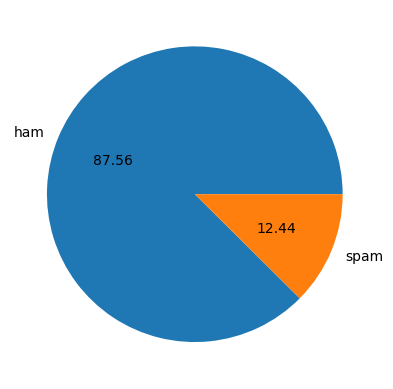

In [192]:
import matplotlib.pyplot as plt

plt.pie(data['class'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

### Data is imbalanced

In [193]:
import nltk

In [194]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Pratik
[nltk_data]     Jadhav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [196]:
# to find len of char in sms

data['num_char'] = data['class_text'].apply(len)

C:\Users\Pratik Jadhav\AppData\Local\Temp\ipykernel_13756\1677057935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_char'] = data['class_text'].apply(len)


In [198]:
data.head()

,class,class_text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [202]:
# to fetch no. of words used in per sms

data['num_words'] = data['class_text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Pratik Jadhav\AppData\Local\Temp\ipykernel_13756\3656648387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = data['class_text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [203]:
data.head()

,class,class_text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [204]:
# to grt number of sentences in each sms

data['num_sent'] = data['class_text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Pratik Jadhav\AppData\Local\Temp\ipykernel_13756\1587572689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sent'] = data['class_text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [205]:
data.head()

,class,class_text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [206]:
data[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5160.000000,5160.000000,5160.000000
mean,79.141279,18.578876,1.951357
std,58.289387,13.390839,1.363466
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [216]:
# only for ham sms 

data[data['class'] == 0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4518.000000,4518.000000,4518.000000
mean,70.860779,17.279327,1.806109
std,56.584730,13.572536,1.281858
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [217]:
# only for spam sms

data[data['class'] == 1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,642.000000,642.000000,642.000000
mean,137.414330,27.724299,2.973520
std,29.975596,7.028380,1.479211
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [220]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

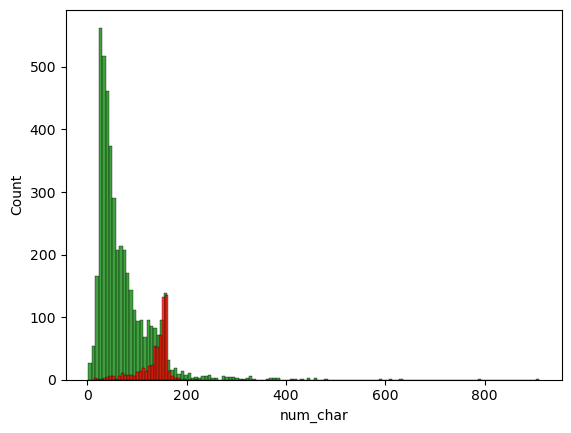

In [223]:
sns.histplot(data[data['class'] == 0]['num_char'],color='green')
sns.histplot(data[data['class'] == 1]['num_char'],color='red')

<Axes: xlabel='num_char', ylabel='Count'>

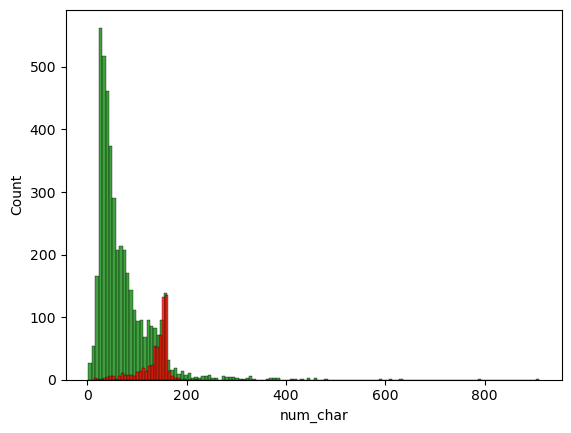

In [227]:
sns.histplot(data[data['class'] == 0]['num_char'],color='green')
sns.histplot(data[data['class'] == 1]['num_char'],color='red')

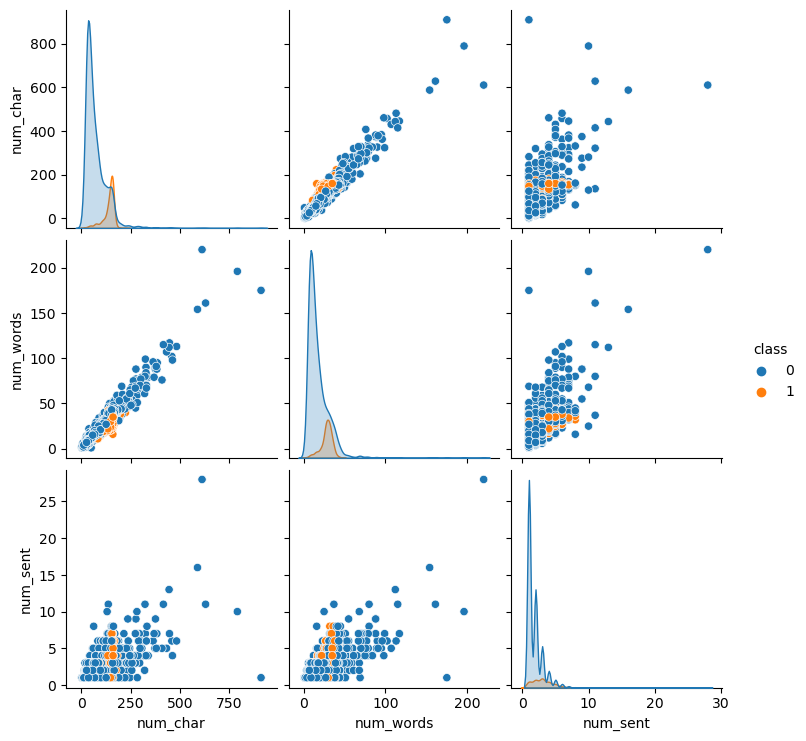

In [226]:
sns.pairplot(data,hue='class')

C:\Users\Pratik Jadhav\AppData\Local\Temp\ipykernel_13756\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

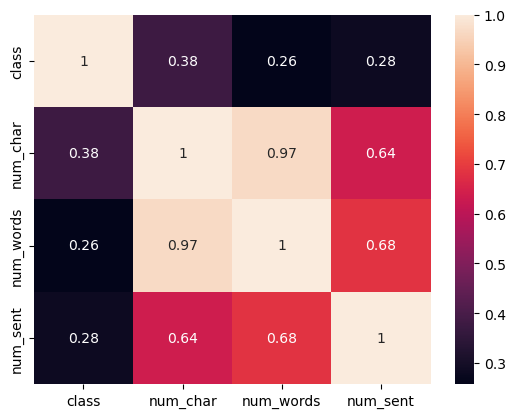

In [231]:
sns.heatmap(data.corr(),annot=True)

### As we see there is Multicollinearity so we will drop 2 of them and keep one which has max co relation which is num_char


In [234]:
!pip install nltk

In [237]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Pratik
[nltk_data]     Jadhav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Data Preprocessing

In [242]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text)  # Tokenize into words

    y = []  # To store words without special characters
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]  # Remove stopwords and punctuation
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]  # Perform stemming
    y.clear()

    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)  # Convert back to string from list of words



In [243]:
# example

transformed_text = transform_text('I loved to watch Series on Netflix. what about you ?')
print(transformed_text)

love watch seri netflix


In [248]:
data['transformed_text'] = data['class_text'].apply(transform_text)

C:\Users\Pratik Jadhav\AppData\Local\Temp\ipykernel_13756\1055394191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = data['class_text'].apply(transform_text)


In [250]:
data.head()

,class,class_text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [256]:
!pip install WordCloud

     -------------------------------------- 152.1/152.1 kB 1.8 MB/s eta 0:00:00


In [264]:
from wordcloud import WordCloud

wc = WordCloud(width=1000,height=800,min_font_size=10,background_color='white')

In [265]:
spam_wc = wc.generate(data[data['class']==1]['transformed_text'].str.cat(sep=' '))

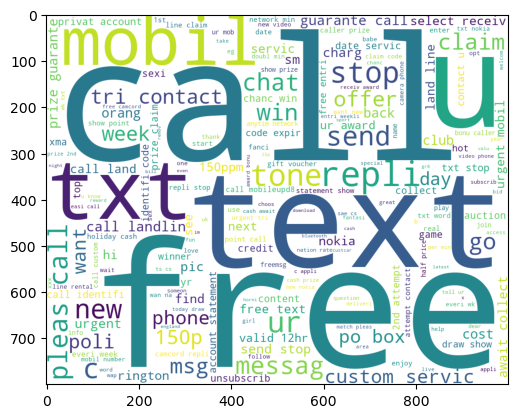

In [266]:
plt.imshow(spam_wc)

In [267]:
ham_wc = wc.generate(data[data['class']==0]['transformed_text'].str.cat(sep=' '))

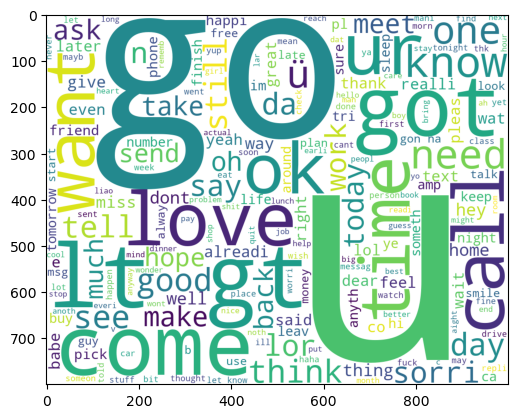

In [268]:
plt.imshow(ham_wc)

In [271]:
spam_corpus = []

for msg in data[data['class'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [272]:
len(spam_corpus)

9808

In [274]:
from collections import Counter

Counter(spam_corpus).most_common(30)

[('call', 313),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 118),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 97),
 ('4', 95),
 ('prize', 79),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 57),
 ('award', 55),
 ('nokia', 54),
 ('contact', 54),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 49),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42)]

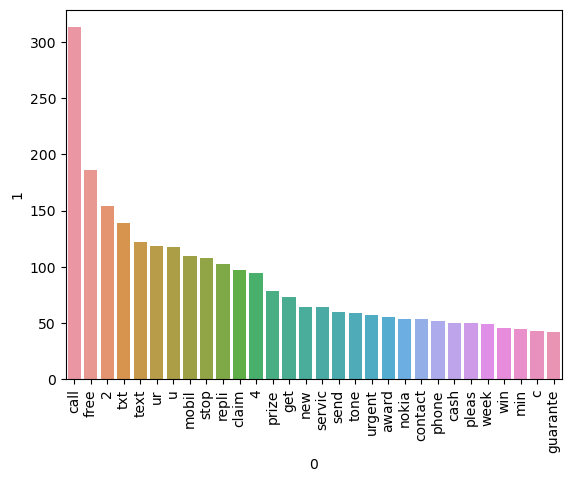

In [281]:
spam_counts = Counter(spam_corpus)

top_30_spam = pd.DataFrame(spam_counts.most_common(30))

sns.barplot(x=0, y=1, data=top_30_spam)
plt.xticks(rotation='vertical')
plt.show()

In [284]:
ham_corpus = []

for msg in data[data['class'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [285]:
Counter(ham_corpus).most_common(30)

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('love', 222),
 ('time', 220),
 ('ok', 218),
 ('good', 215),
 ('want', 209),
 ('ur', 203),
 ('day', 195),
 ('ü', 173),
 ('need', 171),
 ('one', 166),
 ('4', 162),
 ('lor', 159),
 ('home', 152),
 ('think', 150),
 ('see', 148),
 ('take', 144),
 ('still', 144),
 ('da', 138),
 ('tell', 133)]

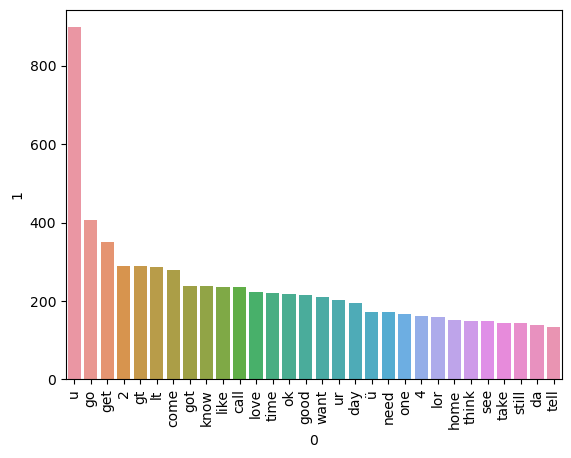

In [286]:
ham_counts = Counter(ham_corpus)

top_30_ham = pd.DataFrame(ham_counts.most_common(30))

sns.barplot(x=0, y=1, data=top_30_ham)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

## Trying with counter vector

In [287]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [288]:
X = cv.fit_transform(data['transformed_text']).toarray()

In [290]:
X.shape

(5160, 6782)

In [291]:
y = data['class'].values

In [292]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [293]:
from sklearn.model_selection import train_test_split

In [294]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [297]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [298]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [299]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874031007751938
[[802 114]
 [ 16 100]]
0.4672897196261682


In [301]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9825581395348837
[[906  10]
 [  8 108]]
0.9152542372881356


In [302]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748062015503876
[[913   3]
 [ 23  93]]
0.96875


## Trying with Tfidf vectorizer

In [303]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [304]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [305]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [306]:
nb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [307]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874031007751938
[[804 112]
 [ 18  98]]
0.4666666666666667


In [308]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9641472868217055
[[916   0]
 [ 37  79]]
1.0


In [309]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748062015503876
[[913   3]
 [ 23  93]]
0.96875


### As we can usesing tfidf with MultinomialNB has given good precision score so we will go with that due accuracy is low but data is imbalace

## lets see with another classifier

In [311]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 1.2 MB/s eta 0:00:00


In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [313]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [314]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [315]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [316]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9689922480620154, 0.9285714285714286)

In [317]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9689922480620154
Precision -  0.9285714285714286
For  KN
Accuracy -  0.9098837209302325
Precision -  1.0
For  NB
Accuracy -  0.9641472868217055
Precision -  1.0
For  DT
Accuracy -  0.9515503875968992
Precision -  0.8837209302325582
For  LR
Accuracy -  0.9486434108527132
Precision -  0.8795180722891566
For  RF
Accuracy -  0.9689922480620154
Precision -  0.9772727272727273
For  AdaBoost
Accuracy -  0.9612403100775194
Precision -  0.9042553191489362
For  BgC
Accuracy -  0.9709302325581395
Precision -  0.8909090909090909
For  ETC
Accuracy -  0.9757751937984496
Precision -  0.989247311827957
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9605263157894737
For  xgb
Accuracy -  0.9709302325581395
Precision -  0.9215686274509803


In [318]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [319]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.909884,1.000000
2,NB,0.964147,1.000000
8,ETC,0.975775,0.989247
5,RF,0.968992,0.977273
9,GBDT,0.955426,0.960526
0,SVC,0.968992,0.928571
10,xgb,0.970930,0.921569
6,AdaBoost,0.961240,0.904255
7,BgC,0.970930,0.890909
3,DT,0.951550,0.883721


In [320]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [321]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.909884
1,NB,Accuracy,0.964147
2,ETC,Accuracy,0.975775
3,RF,Accuracy,0.968992
4,GBDT,Accuracy,0.955426
5,SVC,Accuracy,0.968992
6,xgb,Accuracy,0.970930
7,AdaBoost,Accuracy,0.961240
8,BgC,Accuracy,0.970930
9,DT,Accuracy,0.951550


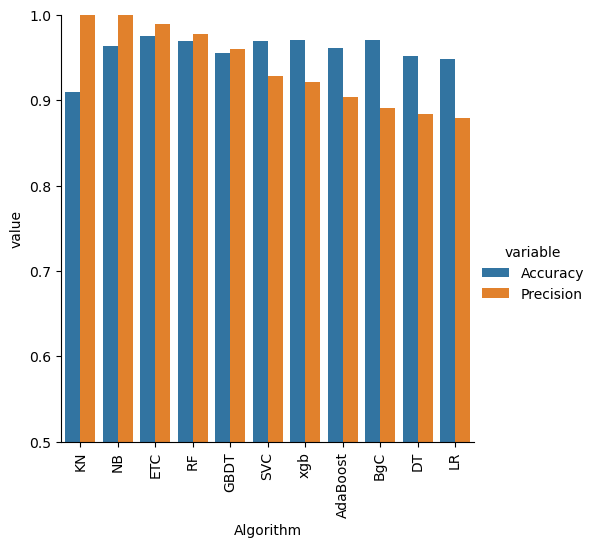

In [322]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [332]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [333]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [336]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [337]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748062015503876
Precision 0.9787234042553191


In [338]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [339]:
from sklearn.ensemble import StackingClassifier

In [340]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [342]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825581395348837
Precision 0.9537037037037037


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

# As we have tried many thing to improve mnb accuracy but not getting better than tfidf vector with max vectorization of 3000 so we will go with mnb 